# 실습 예제 3 : BostonHouse 데이터셋

### 보스턴하우스 데이터 설명
1. CRIM : 자치시(towm)별 1인당 범죄율
2. ZN : 25000 평방피트를 초과하는 거주지역의 비율
3. INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
4. CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
5. NOX : 10ppm당 농축 일산화질소
6. RM : 주택 1가구당 평균 방의 개수
7. AGE : 1940년 이전에 건축된 소유주택의 비율
8. DIS : 5개의 보스턴 직업센터까지의 접근성 지수
9. RAD : 방사형 도로까지의 접근성 지수
10. TAX : 10,000달러 당 재산세율
11. PTRATIO : 자치시(town)별 학생/교사 비율
12. B : 1000(bk-0.63)^2, 여기서 kb는 자치시별 흑인의 비율을 말함
13. LSTAT : 모집단의 하위계층 비율(%)
14. MEDV : 본인 소유의 주택가격(중앙값) (단위 : $1000)

### 데이터 불러오기
예제 데이터(주택가격예측:Boston_data)를 활용해서 회귀를 수행해보도록 하겠습니다. 처음에는 회귀분석을 위한 파이썬 라이브러리는 크게 sckit-learn 과 statsmodels가 있습니다. statsmodels의 경우, 통계기반의 다양한 회귀분석 모형에 특화된 패키지입니다. scikit-learn의 경우, 다양한 기계학습 방법론을 통합하여 제공하는 패키지 입니다. 우선, statsmodels 패키지를 활용하여 선형 회귀분석의 다양한 결과를 도출하고 해석하는 방법을 실습해 보도록 하겠습니다.

In [81]:
from IPython.display import display, HTML
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family="Malgun Gothic")

In [82]:
# 현재경로 확인
os.getcwd()

'c:\\Users\\camar\\OneDrive\\바탕 화면\\fastcampus-data-analysis\\fastcampus_data_analysis\\CH 02'

In [83]:
# 데이터 불러오기
boston = pd.read_csv("../Data/Boston_house.csv")
print(boston.head())

    AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8    2   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7    3   

     ZN  TAX  CHAS  Target  
0  18.0  296     0    24.0  
1   0.0  242     0    21.6  
2   0.0  242     0    34.7  
3   0.0  222     0    33.4  
4   0.0  222     0    36.2  


In [84]:
# EDA
# Data format
print("number of observation in data : {}".format(boston.shape[0]))
print("number of Variables in data : {}".format(boston.shape[1]))

number of observation in data : 506
number of Variables in data : 14


In [85]:
boston_data = boston.drop(['Target'], axis=1)
boston_data

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0


In [86]:
boston_target = boston['Target']
boston_target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

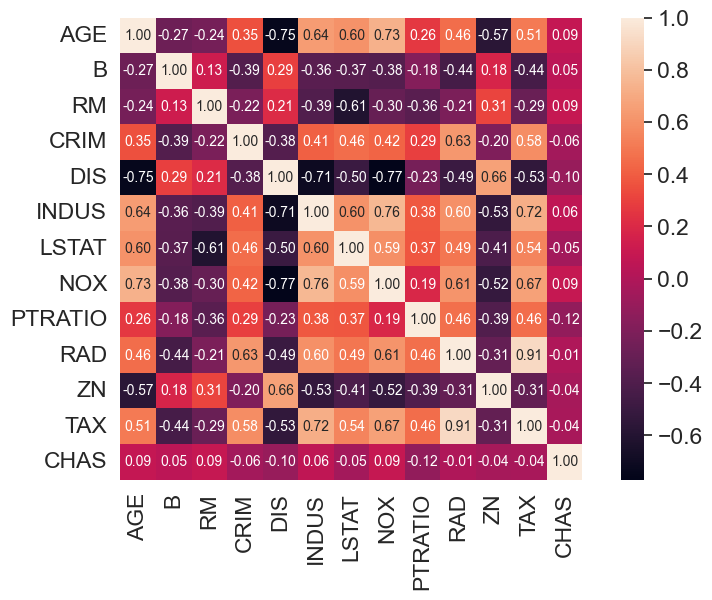

In [87]:
# Correlation analysis
colnames = list(boston_data.columns.values)
X_cm = np.corrcoef(boston_data[colnames].values.T)
sns.set(font_scale=1.5)

plt.figure(figsize=(10,6))
X_hm = sns.heatmap(X_cm, cbar=True, annot=True, square=True, fmt='.2f',
                  annot_kws={'size':10}, yticklabels=colnames, xticklabels=colnames)

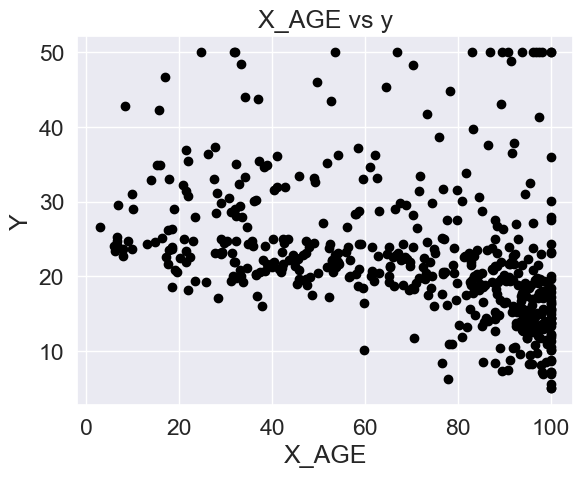

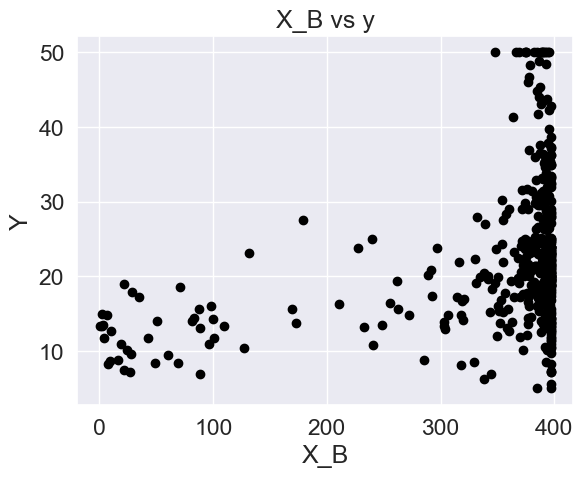

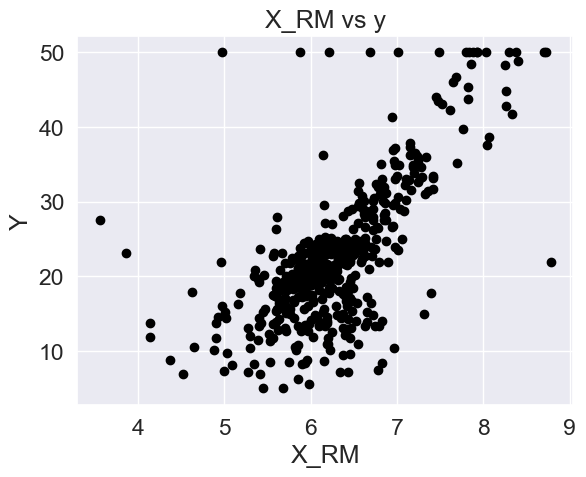

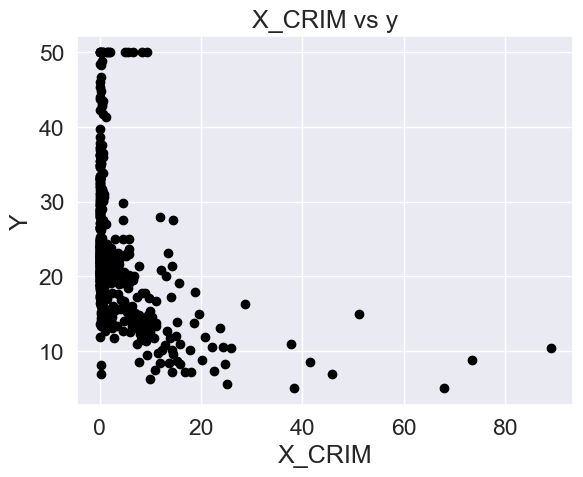

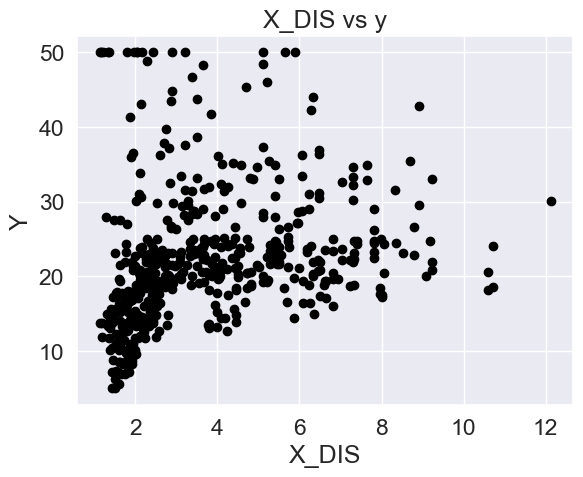

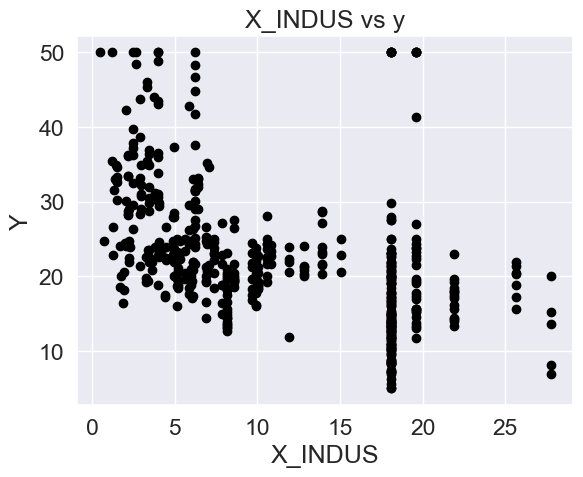

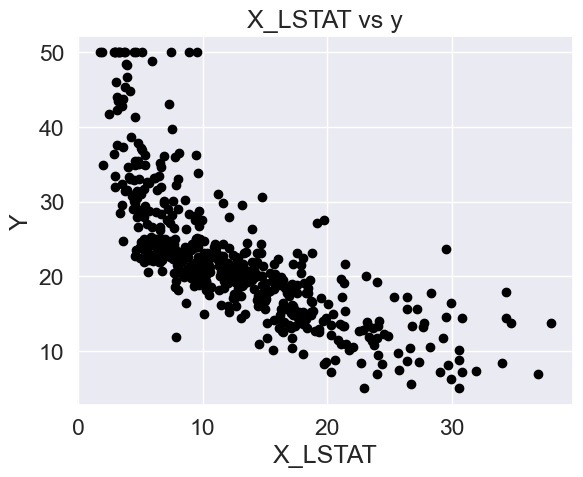

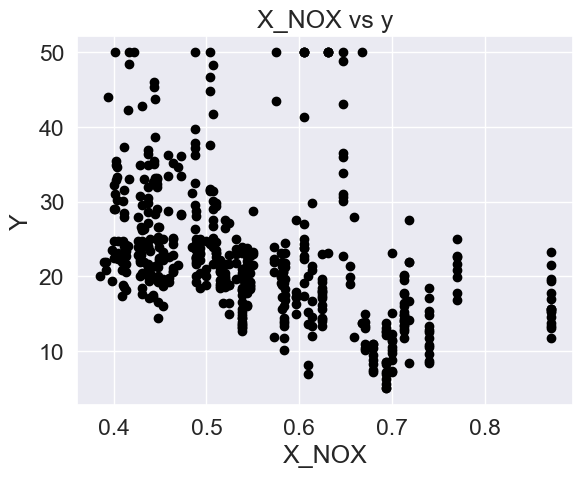

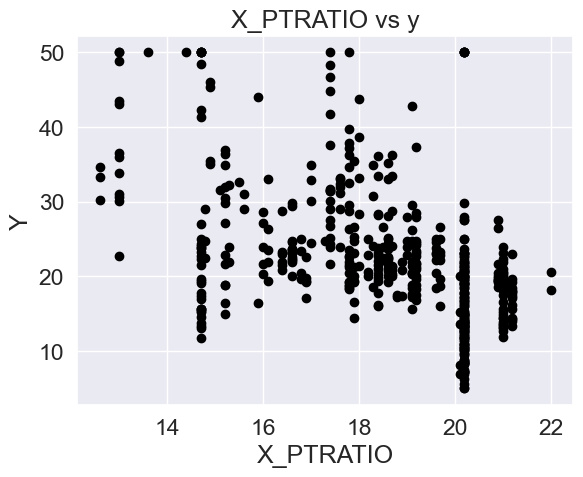

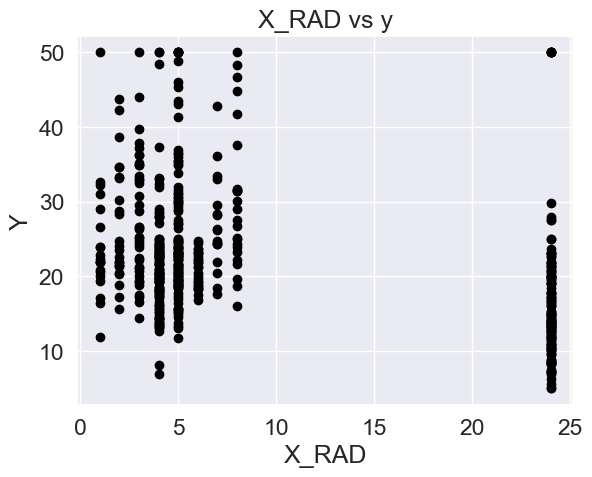

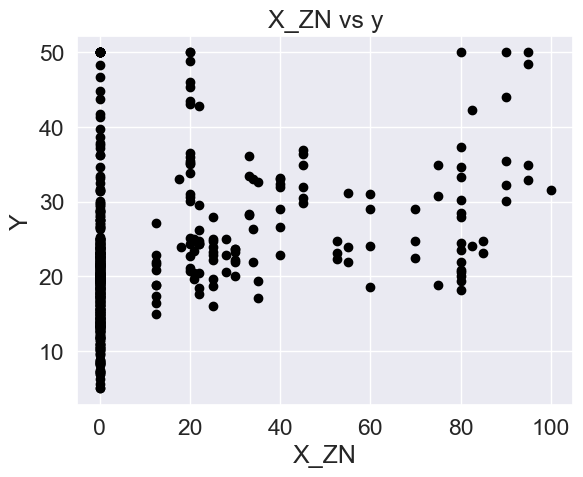

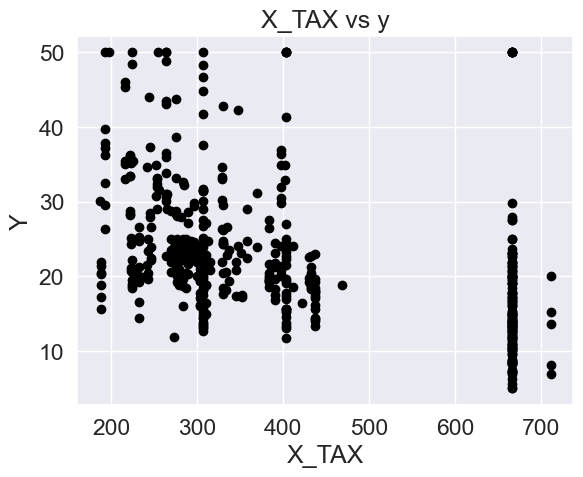

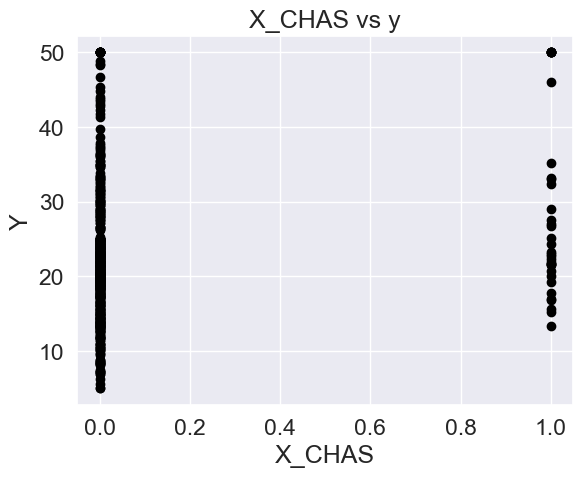

In [88]:
# each X vs Y
for i in range(0, len(colnames)):
  plt.scatter(boston_data.iloc[:, i], boston_target, color='black')
  plt.title('X_{} vs y'.format(colnames[i]))
  plt.xlabel('X_{}'.format(colnames[i]))
  plt.ylabel('Y')
  plt.show()

In [89]:
# split train to test
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


#### statsmodels 패키지에서 제공하는 sm.OLS()메소드를 통해서 모델의 학습 데이터를 정의합니다.

In [90]:
# Training the Multivariate Linaer Regression Model
lm = sm.OLS(y_train, X_train)

#### 정의된 "lm"클래스 객체에서 .fit() 메소드 함수를 통해서 실제 모델 학습을 수행합니다.

In [91]:
lm_trained = lm.fit()

In [92]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              635.9
Date:                Thu, 04 Jan 2024   Prob (F-statistic):                   5.02e-230
Time:                        00:59:06   Log-Likelihood:                         -1062.1
No. Observations:                 354   AIC:                                      2150.
Df Residuals:                     341   BIC:                                      2201.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0167      0.016     -1.053      0.293      -0.048       0.015
B              0.0127      0.003      3.909      0.000       0.006       0.019
RM             5.8864      0.348     16.898      0.000       5.201       6.572
CRIM          -0.1005      0.042     -2.367      0.018      -0.184      -0.017
DIS           -1.0481      0.239     -4.381      0.000      -1.519      -0.578
INDUS         -0.0528      0.074     -0.710      0.478      -0.199       0.093
LSTAT         -0.3992      0.062     -6.477      0.000      -0.520      -0.278
NOX            2.9055      4.067      0.714      0.475      -5.094      10.905
PTRATIO       -0.3532      0.130     -2.708      0.007      -0.610      -0.097
RAD            0.2458      0.085      2.906      0.004       0.079       0.412
ZN             0.0543      0.017      3.228      0.001       0.021       0.087
TAX           -0.0147      0.005     -3.032      0.003      -0.024      -0.005
CHAS          -0.4755      1.152     -0.413      0.680      -2.742       1.791
==============================================================================
Omnibus:                      164.478   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1243.960
Skew:                           1.782   Prob(JB):                    7.54e-271
Kurtosis:                      11.464   Cond. No.                     8.56e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

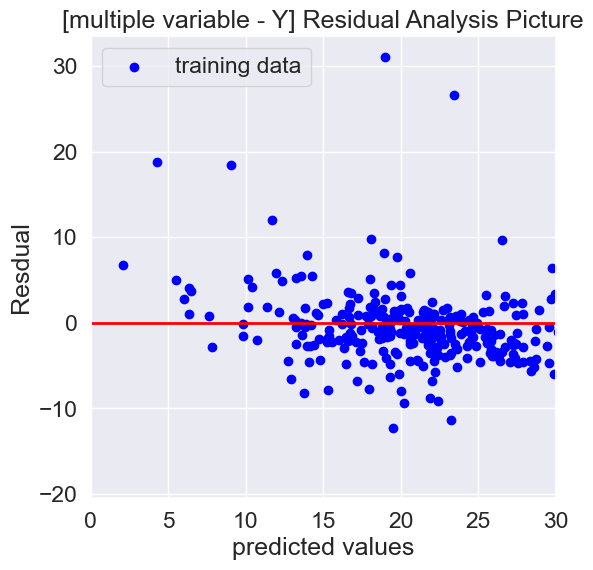

In [93]:
# Check the Model Assumption: residual bu scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid, c='blue', marker='o', label='training data')
plt.xlabel('predicted values')
plt.ylabel('Resdual')
plt.hlines(y=0, xmin=0, xmax=30, lw=2, color='red')
plt.xlim([-0, 30])
plt.title('[multiple variable - Y] Residual Analysis Picture')
plt.legend(loc=2)
plt.show()

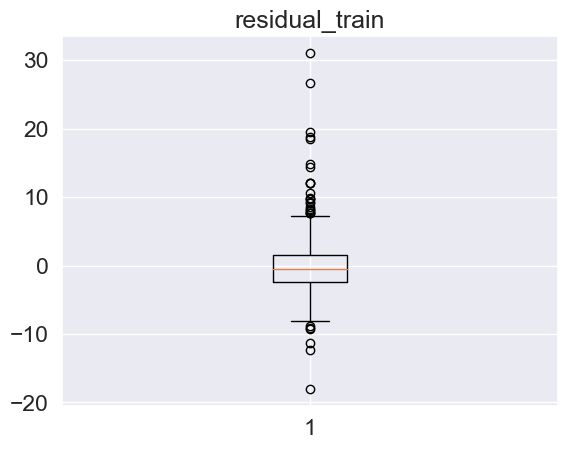

In [94]:
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

In [95]:
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
print(y_pred_train.head())

379    17.944720
7      18.917592
387     6.356175
19     19.120728
93     27.425138
dtype: float64


In [96]:
y_pred_test = lm_trained.predict(X_test)
print(y_pred_test.head())

468    16.192565
96     23.082084
394    18.364953
304    34.906157
433    18.281301
dtype: float64


# 실제값 - 모델 출력 값 산점도를 통한 비교

In [97]:
lm_trained.fittedvalues

379    17.944720
7      18.917592
387     6.356175
19     19.120728
93     27.425138
         ...    
363    18.630206
298    27.056089
471    20.902436
460    21.473543
265    25.822380
Length: 354, dtype: float64

In [98]:
y_predicted = lm_trained.predict(X_test)
y_predicted.head()

468    16.192565
96     23.082084
394    18.364953
304    34.906157
433    18.281301
dtype: float64

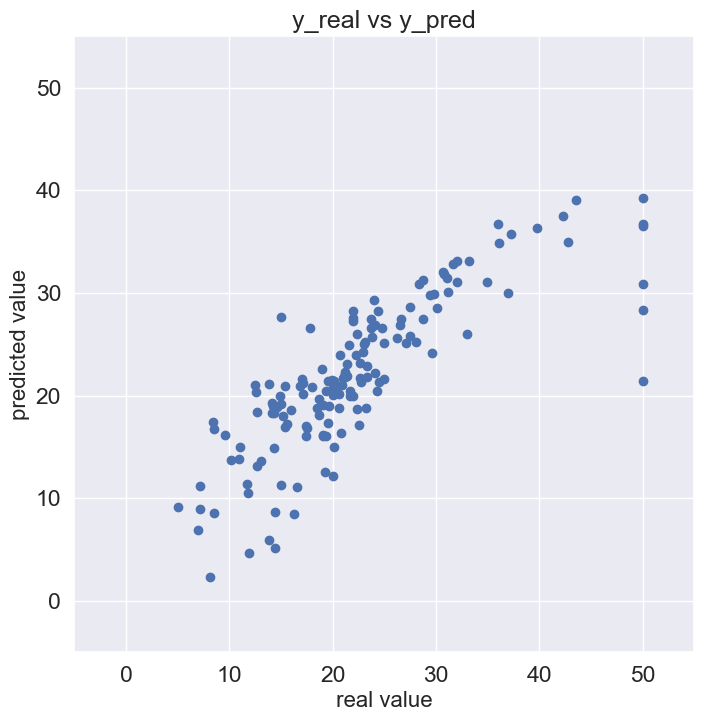

In [99]:
plt.figure(figsize=(8,8))
plt.title('y_real vs y_pred')
plt.scatter(y_test, y_predicted)
plt.xlabel('real value', size=16)
plt.ylabel('predicted value', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

# 모델 출력 값 평가를 위한 지표들

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Mean Squared Error (평균 제곱 오차)
낮을수록 좋은 모델

In [101]:
print(mean_squared_error(y_test, y_predicted))

28.688996284185436


### Root Mean Squared Error (제곱근 평균 제곱 오차)

In [102]:
print(np.sqrt(mean_absolute_error(y_test, y_predicted)))

1.8978425292286043


### Mean Absolute percentage Error (평균 절대 백분율 오차)

In [103]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, y_predicted))

18.935126429580837


### Correlation Coefficient(상관계수)

In [104]:
print(np.corrcoef(y_test, y_predicted))

[[1.         0.81965309]
 [0.81965309 1.        ]]


### R squared (결정계수 (r)^2) 
높을수록 좋은 모델

In [105]:
print(r2_score(y_test, y_predicted))

0.6702122159902391


### 학습 데이터와 평가 데이터가 얼마나 차이나는지 확인해보자.

In [106]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [114]:
# MSE : Measn of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('mse_train : %.2f, mse_test : %.2f' %(mse_train, mse_test))

mse_train : 23.64, mse_test : 28.69


In [118]:
# MAE : Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_train : %.2f, mae_test : %.2f' %(mae_train, mae_test))

mae_train : 3.20, mae_test : 3.60


In [115]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [119]:
# MAPE : Mean of Absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('mape_train : %.2f, mape_test : %.2f' %(mape_train, mape_test))

mape_train : 16.73, mape_test : 18.94


In [120]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('r2_train : %.2f, r2_test : %.2f' %(r2_train, r2_test))

r2_train : 0.72, r2_test : 0.67
